In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Plot settings
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=16)
plt.rc("figure", figsize=(7, 5), titlesize=18)

In [3]:
# Functions
def load_data(pressure = 0.5, procent_of_data = 1, length_of_data = 10, num = '1'):
    data = pd.DataFrame({'Tid': [], 'Kanal B': []})
    with open(f'../Data/eks_1/{pressure}_bar_{num}.csv', 'r') as file:
        count = 0
        for i in range(5, length_of_data):
            if i % int(1/procent_of_data) == 0:
                try:
                    data.loc[count] = [float(x.replace(',', '.')) for x in file.readline().split(';')]
                    count += 1
                except:
                    pass
            file.readline()
    return data

def make_ax(data, x, y, xlabel = 'x', ylabel = 'y', title = 'Title', figsize = (10, 10), label = None):
    # Make fig and ax
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot data
    ax.plot(data[x], data[y], label = label, color = '#006663')

    # Set title and axis labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Return fig and ax
    return fig, ax

def plot_ax(ax, legend = False, grid = False, save = False, filename = 'default.pdf'):
    if grid:
        ax.grid()
    if legend:
        ax.legend()
    if save:
        plt.savefig(filename)
    plt.show()
    
def cut_data(data, xlimit_file): # Takes in a list of dataframes and cuts them on x-axis according to xlimit_file
    # Load in xlimits in dict form, such that xlimits = {'0.5': [lower xlimit, upper xlimit], ...}
    xlimits = {'1': {}, '2': {}, '3': {}}
    with open(xlimit_file, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            line = line.split(',')
            if i != 0:
                if line[0] == '1':
                    xlimits['1'][line[1]] = [float(i) for i in line[2].split('-')] 
                if line[0] == '2':
                    xlimits['2'][line[1]] = [float(i) for i in line[2].split('-')]
                if line[0] == '3':
                    xlimits['3'][line[1]] = [float(i) for i in line[2].split('-')] 
    
    # Create a dict of new dataframes
    new_data = {}
    for num in ['1', '2', '3']:
        data_temp = {}
        for pressure, d in data[num].items():
            temp_holder_for_data = d[d.Tid > xlimits[num][pressure][0]]
            data_temp[pressure] = temp_holder_for_data[temp_holder_for_data.Tid < xlimits[num][pressure][1]]
        new_data[num] = data_temp
        
    # Return new data
    return new_data, xlimits

In [4]:
# Find length of data
length = len(pd.read_csv('../Data/eks_1/0.5_bar_1.csv', delimiter = ';'))

# Get nescesarry data
pressures = ['0.5', '0.6', '0.7', '0.8', '0.9', '1']
data = {}
for num in ['1', '2', '3']:
    data_temp = {}
    for pressure in pressures:
        if pressure == '0.7' and num == '2': # Faulty file
            continue
        elif pressure == '0.9' and num == '3': # Faulty file
            continue
        data_temp[pressure] = load_data(pressure = pressure, procent_of_data = 0.02, length_of_data = length, num = num)
    data[num] = data_temp

In [5]:
# Visualize dataframe
data['1']['0.5'].head()

,Tid,Kanal B
0,0.00168,0.281127
1,0.00372,0.281127
2,0.00576,0.281127
3,0.00780,0.281127
4,0.00984,0.281127


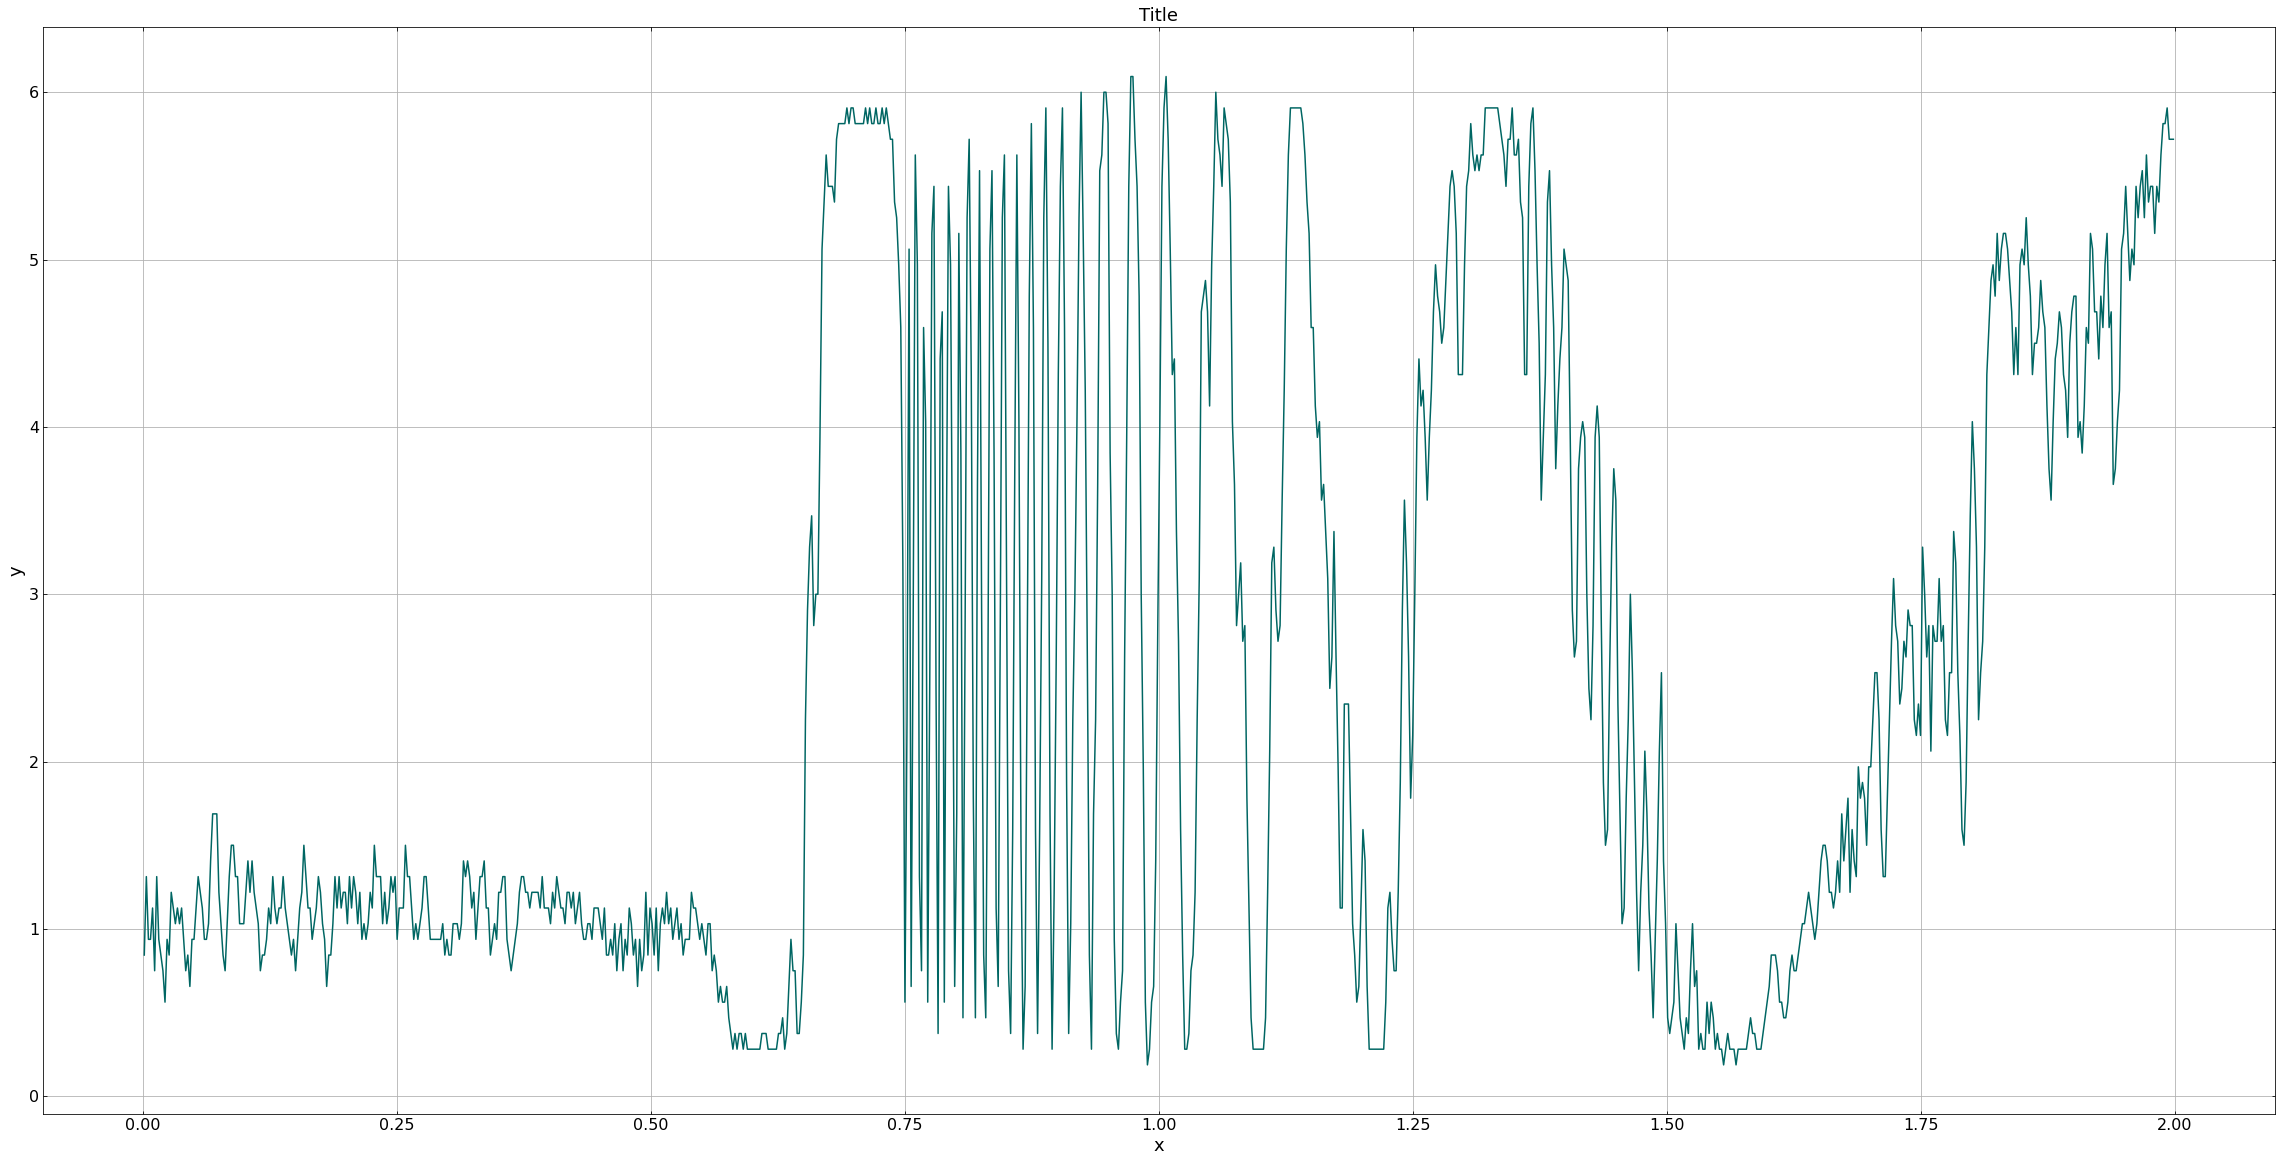

In [6]:
# Make ax and fig
fig, ax = make_ax(data['3']['1'], x = 'Tid', y = 'Kanal B', figsize = (40, 20))

# Plot ax
plot_ax(ax, grid = True)

In [7]:
# Cut data on x-axis according to xlimits.txt
new_data, xlimits = cut_data(data, xlimit_file = 'x_limits.txt')

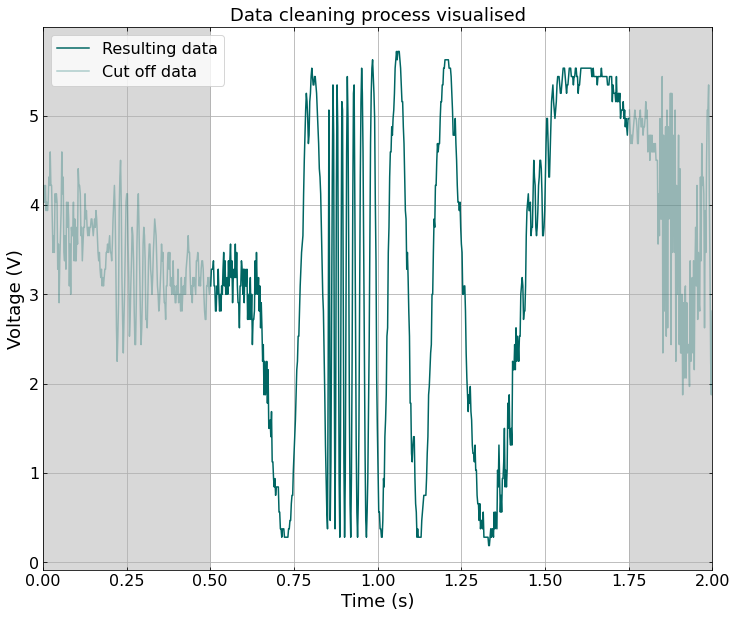

In [8]:
# Make ax and fig of cutted data
fig, ax = make_ax(new_data['2']['0.6'], x = 'Tid', y = 'Kanal B',
                  xlabel = 'Time (s)', ylabel = 'Voltage (V)', label = 'Resulting data', 
                  title = 'Data cleaning process visualised', figsize = (12, 10))

# Fill in uncut data in opaque blue
left_data = data['2']['0.6'][data['2']['0.6']['Tid'] < xlimits['2']['0.6'][0]]
right_data = data['2']['0.6'][data['2']['0.6']['Tid'] > xlimits['2']['0.6'][1]]
ax.plot(left_data['Tid'], left_data['Kanal B'], alpha = 0.3, color = '#006663', label = 'Cut off data')
ax.plot(right_data['Tid'], right_data['Kanal B'], alpha = 0.3, color = '#006663')

# Plot cutted data as shaded region
ax.axvspan(-1, xlimits['2']['0.6'][0], color='grey', alpha=0.3)
ax.axvspan(xlimits['2']['0.6'][1], 3, color='grey', alpha=0.3)

# Restrict x-axis
plt.xlim([0, 2])

# Plot ax
plot_ax(ax, grid = True, legend = True, save = True, filename = '../../../Final_graphs/data_cleaning_process_eks_1_visualised.pdf')

In [9]:
# Upload cut data to csv files in Cleaned_Data directory
if False:
    for num in ['1', '2', '3']:
        for pressure, d in new_data[num].items():
            d.to_csv(f'../Cleaned_Data/Data_1/cut_{pressure}_bar_{num}.csv')

In [10]:
if False:
    for num in ['1', '2', '3']:
        for pressure, d in new_data[num].items():
            # Make ax and fig
            fig, ax = make_ax(d, x = 'Tid', y = 'Kanal B', figsize = (20, 10), 
                              title = f'pressure: {pressure}, number: {num}',
                              xlabel = 'Time (ms)', ylabel = 'Voltage (V)')

            # Plot ax
            plot_ax(ax, grid = True, save = True, filename = f'../Cleaned_Data/Pdf_1/cut_{pressure}_bar_{num}.pdf')

In [11]:
xlimits['1']['0.6'][0]

0.75